In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [266]:
dflu=pd.read_csv('base_luisa.csv')
dfmica=pd.read_csv('subsample_MF_demo.csv')
dfmica

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod
0,175,0.836,ARE,3,20310.10900,NaN,2.5,5.279841,NaN,NaN,NorthAfrica
1,5,0.784,ATG,10,12257.71000,NaN,7.3,NaN,NaN,79.731438,Caribbean
2,189,0.697,UZB,1,7370.72020,29.746000,6.3,NaN,NaN,92.207382,EastEurope
3,56,0.863,EST,1,19768.03900,1.316000,3.5,4.364779,5.48164,94.391281,EastEurope
4,138,0.841,PRT,5,23744.63100,10.401000,2.2,4.273323,5.12559,93.035027,WesternDem
5,39,0.498,COM,4,972.35999,0.776000,7.8,NaN,4.86862,43.934471,SubSaharian
6,33,0.764,LKA,8,5466.87010,20.541000,7.8,4.644127,1.92566,85.426140,SouthAsia
7,145,0.762,KNA,10,11237.75000,NaN,NaN,NaN,2.78424,82.931938,Caribbean
8,119,NaN,NRU,9,3130.47000,0.012000,NaN,NaN,NaN,71.945343,Pacific
9,80,0.920,IRL,5,46422.07000,4.621000,2.8,5.434197,5.32457,99.573357,WesternDem


In [267]:
import ancillary_funcs
from ancillary_funcs import medidas_descriptivas
from ancillary_funcs import observaciones_perdidas
from ancillary_funcs import dotplot

dflu

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,98,0.719,LBY,3,4102.83980,6.266000,6.4,1.874972,NaN,NaN
1,177,0.764,TUR,3,16900.71100,77.695999,3.7,3.422157,4.76626,87.164551
2,193,0.576,ZMB,4,1916.79000,NaN,7.8,4.328835,NaN,NaN
3,4,0.531,AGO,4,3771.20000,25.789000,6.0,2.134716,NaN,NaN
4,7,0.826,ARG,2,15102.61000,41.733002,3.0,2.983357,5.32549,88.246002
5,33,0.764,LKA,8,5466.87010,20.541000,7.8,4.644127,1.92566,85.426140
6,61,0.694,GAB,4,14525.28000,NaN,5.5,2.875665,2.66617,NaN
7,167,0.909,SWE,5,39000.91000,9.645000,1.5,4.577006,7.67509,96.651558
8,86,0.793,KAZ,1,14098.88000,17.422001,3.6,3.581975,2.78750,95.946281
9,88,0.550,KEN,4,1494.63000,40.700001,7.5,4.509935,5.27475,NaN


In [268]:
observaciones_perdidas(dflu,'undp_hdi',True)

3
58    SMR
70    SOM
87    TUV
Name: ccodealp, dtype: object


In [269]:
observaciones_perdidas(dflu,'ccodealp',True)

0
Series([], Name: ccodealp, dtype: object)


In [270]:
observaciones_perdidas(dflu,'ht_region',True)

0
Series([], Name: ccodealp, dtype: object)


In [271]:
observaciones_perdidas(dflu,'gle_cgdpc',True)

1
54    SSD
Name: ccodealp, dtype: object


In [272]:
observaciones_perdidas(dflu,'imf_pop',True)

23
2     ZMB
6     GAB
12    NAM
14    GNQ
25    ERI
27    BWA
28    KNA
35    TCD
36    BDI
38    DMA
41    GNB
42    ARE
45    ATG
48    CRI
52    VEN
54    SSD
56    DOM
59    NER
61    DJI
70    SOM
72    TKM
77    COG
93    HTI
Name: ccodealp, dtype: object


In [273]:
observaciones_perdidas(dflu,'ffp_hf',True)

7
16    VUT
23    LCA
28    KNA
38    DMA
47    TON
58    SMR
87    TUV
Name: ccodealp, dtype: object


In [274]:
observaciones_perdidas(dflu,'wef_qes',True)

21
14    GNQ
16    VUT
18    AFG
23    LCA
25    ERI
28    KNA
37    FJI
38    DMA
41    GNB
45    ATG
47    TON
51    WSM
54    SSD
58    SMR
59    NER
60    TGO
61    DJI
70    SOM
72    TKM
77    COG
87    TUV
Name: ccodealp, dtype: object


In [275]:
observaciones_perdidas(dflu,'wdi_expedu',True)

28
0     LBY
2     ZMB
3     AGO
12    NAM
14    GNQ
15    KWT
19    DZA
20    TTO
25    ERI
27    BWA
38    DMA
42    ARE
43    MMR
45    ATG
47    TON
51    WSM
52    VEN
56    DOM
61    DJI
65    PHL
68    NGA
70    SOM
75    MAR
77    COG
83    BIH
87    TUV
88    GRC
93    HTI
Name: ccodealp, dtype: object


In [276]:
observaciones_perdidas(dflu,'wdi_ners',True)

27
0     LBY
2     ZMB
3     AGO
6     GAB
9     KEN
12    NAM
14    GNQ
19    DZA
20    TTO
27    BWA
30    CIV
31    VNM
35    TCD
41    GNB
42    ARE
44    CZE
49    AUT
54    SSD
58    SMR
60    TGO
61    DJI
68    NGA
70    SOM
72    TKM
77    COG
83    BIH
93    HTI
Name: ccodealp, dtype: object


In [277]:
dflu['gle_cgdpc']=(dflu['undp_hdi']-dflu['undp_hdi'].mean())/np.std(dflu)['undp_hdi']

In [278]:
varz=dflu.sort_values(by=['gle_cgdpc'])
varz=varz.dropna(subset=['gle_cgdpc'])
varz.iloc[:10]

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull
59,125,0.351,NER,4,-2.225772,NaN,6.9,NaN,6.70941,15.665040,False
35,34,0.394,TCD,4,-1.947223,NaN,8.6,2.528029,2.84971,NaN,True
62,187,0.399,BFA,4,-1.914834,16.500,6.9,2.868712,4.60476,26.492809,False
36,26,0.406,BDI,4,-1.869489,NaN,6.8,2.595249,5.41642,24.948179,False
50,116,0.414,MOZ,4,-1.817665,25.733,7.4,2.770460,6.48322,19.439980,False
25,55,0.418,ERI,4,-1.791754,NaN,7.6,NaN,NaN,28.415560,False
41,139,0.421,GNB,4,-1.772320,NaN,8.5,NaN,2.17313,NaN,True
54,163,0.421,SSD,4,-1.772320,NaN,6.9,NaN,1.71297,NaN,True
11,106,0.438,MLI,4,-1.662196,14.854,8.4,3.003276,3.73929,34.616100,False
30,83,0.466,CIV,4,-1.480816,22.524,6.7,3.562079,4.72938,NaN,True


In [279]:
dflu['region_recod']= dflu['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])


[<matplotlib.lines.Line2D object at 0x04D4E1B0>] Line2D(_line1)


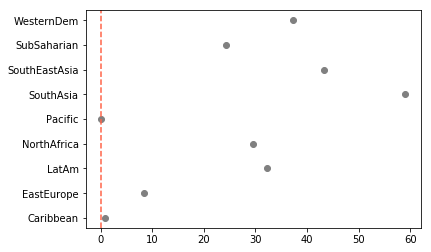

In [280]:
def dotplot(df,plot_var,plot_by,global_stat=False,statistic='zscore'):
    tmp_df=df.loc[:,[plot_by,plot_var]]
    tmp_df['get_zscore']=(tmp_df[plot_var]-tmp_df[plot_var].mean()/len(tmp_df[plot_var]))
    if global_stat is True and statistic is 'mean':
        tmp_group_stat=tmp_df.groupby(group_by)[plot_var].mean()
        print(plt.plot(tmp_group_stat.values,tmp_group_stat.index,'o',color='grey'),
              plt.axvline(df[plot_var].mean(), color='tomato',linestyle='--'))
    if global_stat is True and statistic is 'median':
        tmp_group_stat=tmp_df.groupby(plot_by)[plot_var].median()
        print(plt.plot(tmp_group_stat.values,tmp_group_stat.index,'o',color='grey'),
              plt.axvline(df[plot_var].median(), color='tomato',linestyle='--'))
    if global_stat is True and statistic is 'zscore':
        tmp_group_stat=tmp_df.groupby(plot_by)['get_zscore'].mean()
        print(plt.plot(tmp_group_stat.values,tmp_group_stat.index,'o',color='grey'),
              plt.axvline(0,color='tomato',linestyle='--'))
dotplot(dflu,'imf_pop','region_recod',global_stat=True,statistic='zscore')

In [281]:
 def varcompar(df1,df2,var,log=False):
    if log is True:
        df1[var]=np.log(df1[var])
        df2[var]=np.log(df2[var])
    
    med1=df1[var].dropna().mean()
    med2=df2[var].dropna().mean()
    sig1=np.std(df1[var].dropna())
    sig2=np.std(df2[var].dropna())
    plt.subplot(1,2,1),
    x_axis=np.linspace(df1[var].min(),df2[var].max(),100)
    plt.plot(x_axis,stats.norm.pdf(x_axis, med1, sig1),color='tomato',lw=3,label='muestra Micaela'),
    plt.plot(x_axis,stats.norm.pdf(x_axis, med2, sig2),color='blue',lw=3, label='muestra Luisa'),
    plt.title('Curvas de Densidad'), plt.legend()

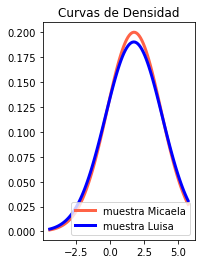

In [282]:
varcompar(dfmica,dflu,'imf_pop',log=True)

C:\Users\Felix\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


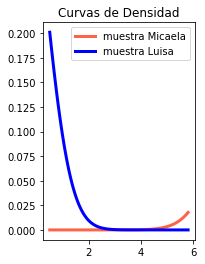

In [283]:
varcompar(dfmica,dflu,'gle_cgdpc',log=True)

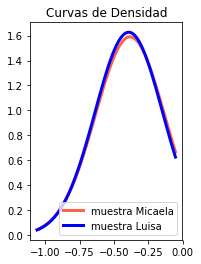

In [284]:
varcompar(dfmica,dflu,'undp_hdi',log=True)